# Práctica 1. Web Scraping - Gráficas
**Nombres:** Juan Pablo Upoff, Ponce Proaño Miguel Alejandro

**Asignatura:** M2.851 - Tipología y ciclo de vida de los datos aula 1

**Actividad:** M2.851-20202-1134081-práctica1

## Librerías utilizadas

In [10]:
import pandas as pd
import os
from os import path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import random
import geoplotlib

In [11]:
pd.set_option('float_format', '{:f}'.format)

## Leer los datos de la hipotecas y empresas
**Dataset**: empresas_hipotecas_españa_2012_2017_importe_hipotecas

In [65]:
df_empresas_hipotecas = pd.read_csv('../csv/empresas_hipotecas_españa_2012_2017_importe_hipotecas.csv')
print(df_empresas_hipotecas.info())
df_empresas_hipotecas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       3000 non-null   float64
 1   Codigo         3000 non-null   float64
 2   Provincia      3000 non-null   object 
 3   Total          3000 non-null   float64
 4   Anio           3000 non-null   int64  
 5   TipoEmpresa    3000 non-null   object 
 6   cod            3000 non-null   float64
 7   Shape__Area    3000 non-null   float64
 8   Shape__Length  3000 non-null   float64
 9   TipoHipoteca   3000 non-null   object 
 10  M01            3000 non-null   float64
 11  M02            3000 non-null   float64
 12  M03            3000 non-null   float64
 13  M04            3000 non-null   float64
 14  M05            3000 non-null   float64
 15  M06            3000 non-null   float64
 16  M07            3000 non-null   float64
 17  M08            3000 non-null   float64
 18  M09     

,OBJECTID,Codigo,Provincia,Total,Anio,TipoEmpresa,cod,Shape__Area,Shape__Length,TipoHipoteca,...,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,...,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
1,2.000000,2.000000,Albacete,26921.000000,2017,Total,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,...,28018.000000,19598.000000,52585.000000,23393.000000,44807.000000,35571.000000,44849.000000,16399.000000,38425.000000,23339.000000
2,3.000000,3.000000,Alicante,135480.000000,2017,Total,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,...,210355.000000,222585.000000,153248.000000,157547.000000,121150.000000,128666.000000,206276.000000,125571.000000,150514.000000,115540.000000
3,4.000000,4.000000,Almería,42329.000000,2017,Total,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,...,79137.000000,100574.000000,63395.000000,55218.000000,54463.000000,161397.000000,109346.000000,64817.000000,114675.000000,66255.000000
4,5.000000,5.000000,Ávila,10178.000000,2017,Total,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,...,5413.000000,8598.000000,6185.000000,8805.000000,7332.000000,3406.000000,8994.000000,6545.000000,7827.000000,6345.000000


### Conversión a tabla pivote

In [4]:
columnas_base = ["OBJECTID","Codigo","Provincia","cod","Shape__Area","Shape__Length","TipoHipoteca","Anio","TipoEmpresa","Total"]
df_total_mes = df_empresas_hipotecas.melt(id_vars=columnas_base,var_name="Mes",value_name="TotalMes")
df_total_mes.head(10)

,OBJECTID,Codigo,Provincia,cod,Shape__Area,Shape__Length,TipoHipoteca,Anio,TipoEmpresa,Total,Mes,TotalMes
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2017,Total,18518.000000,M01,48296.000000
1,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2017,Total,18518.000000,M01,343.000000
2,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,2017,Total,26921.000000,M01,18417.000000
3,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,2017,Total,26921.000000,M01,210.000000
4,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,2017,Total,135480.000000,M01,165330.000000
5,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas,2017,Total,135480.000000,M01,1620.000000
6,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,2017,Total,42329.000000,M01,53648.000000
7,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas,2017,Total,42329.000000,M01,533.000000
8,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,2017,Total,10178.000000,M01,5644.000000
9,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas,2017,Total,10178.000000,M01,87.000000


In [201]:
df_total_mes.head(3000)

,OBJECTID,Codigo,Provincia,cod,Shape__Area,Shape__Length,TipoHipoteca,Anio,TipoEmpresa,Total,Mes,TotalMes
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2017,Total,18518.000000,M01,48296.000000
1,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2017,Total,18518.000000,M01,343.000000
2,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,2017,Total,26921.000000,M01,18417.000000
3,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,2017,Total,26921.000000,M01,210.000000
4,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,2017,Total,135480.000000,M01,165330.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,48.000000,48.000000,Bizkaia,48.000000,4161383760.410160,618804.570091,Numero_hipotecas,2013,Sociedades_responsabilidad-limitada,23316.000000,M01,1197.000000
2996,49.000000,49.000000,Zamora,49.000000,18976873417.340801,1017874.534827,Importe_hipotecas,2013,Sociedades_responsabilidad-limitada,3438.000000,M01,15178.000000
2997,49.000000,49.000000,Zamora,49.000000,18976873417.340801,1017874.534827,Numero_hipotecas,2013,Sociedades_responsabilidad-limitada,3438.000000,M01,189.000000
2998,50.000000,50.000000,Zaragoza,50.000000,30937790469.125000,1582276.455628,Importe_hipotecas,2013,Sociedades_responsabilidad-limitada,21455.000000,M01,122004.000000


## Representaciones Gráficas

[Text(0, 0, 'Araba/Álava'),
 Text(1, 0, 'Cáceres'),
 Text(2, 0, 'Rioja, La'),
 Text(3, 0, 'Asturias'),
 Text(4, 0, 'Salamanca'),
 Text(5, 0, 'Santa Cruz de Tenerife'),
 Text(6, 0, 'Toledo')]

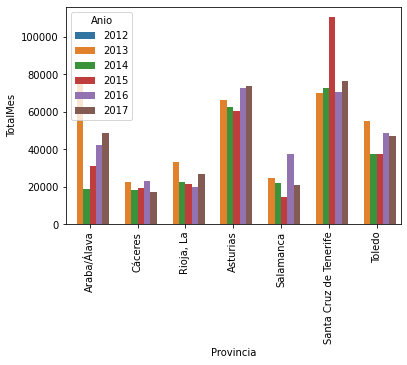

In [83]:
ciudades = random.choices(np.unique(df_total_mes['Provincia']), k=7)
df_ciudades_mes = df_total_mes[(df_total_mes['TipoHipoteca']=='Importe_hipotecas')
                            &(df_total_mes['TipoEmpresa']!='Total')
                            &(df_total_mes['Mes']=='M01')
                            &(df_total_mes['Provincia'].isin(ciudades))]
ax=sns.barplot(x='Provincia', y='TotalMes', hue='Anio', data=df_ciudades_mes)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Gráfica Totales Mes Hipotecas

En la gráfica se puede observar que no los registros de importe de hipotecas se empiezan a registrar desde el año 2012, esta información es importante si deseamos realizar análisis de regresión o modelos de clasificación.

(array([2010., 2012., 2014., 2016., 2018.]),
 [Text(2010.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2013'),
  Text(2016.0, 0, '2014'),
  Text(2018.0, 0, '2015')])

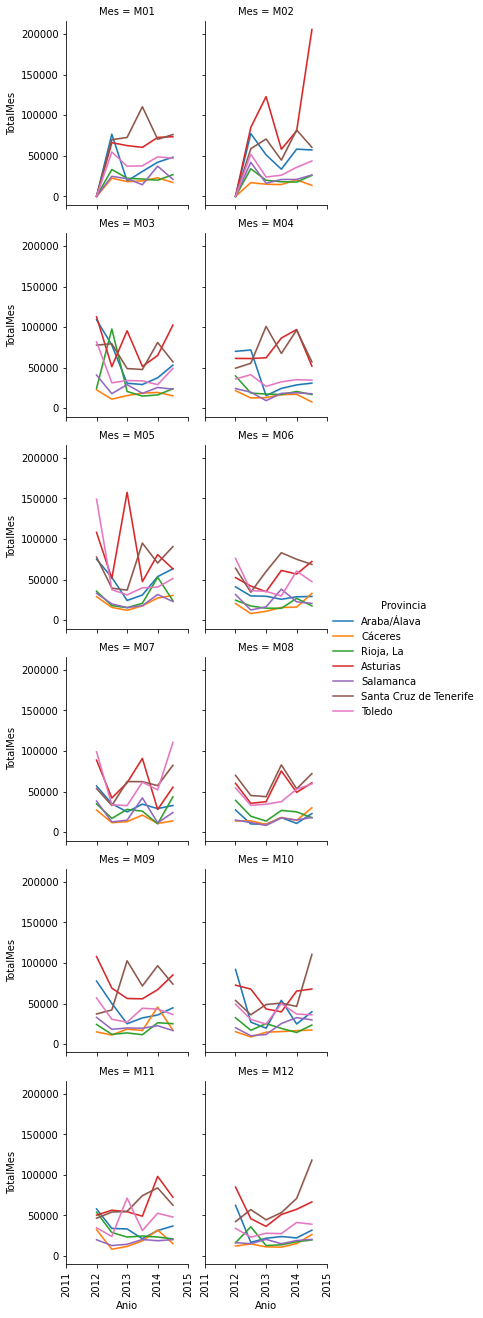

In [99]:
df_ciudades = df_total_mes[(df_total_mes['TipoHipoteca']=='Importe_hipotecas')
                            &(df_total_mes['TipoEmpresa']!='Total')                            
                            &(df_total_mes['Provincia'].isin(ciudades))]
ax1=sns.relplot(x='Anio', y='TotalMes', hue='Provincia',
               col="Mes",data=df_ciudades,kind="line",col_wrap=2,
                height=3, aspect=.8)
ax1.set_xticklabels(rotation=90)
plt.xticks(rotation=90)

## GRAPH II
**Hipotecas totales por año:** En el siguiente gráfico se observa el aumento de adquisición de viviendas hasta 2008, y una fuerte caida hasta 2014, cuando la economía se recuperó y volvió a subir.

Text(0, 0.5, 'HIPOTECAS TOTALES')

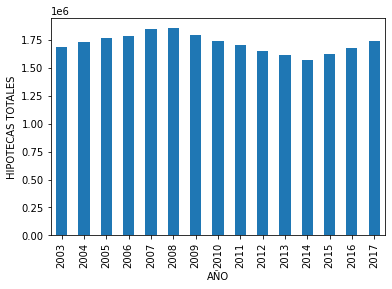

In [147]:
df_num_empr = pd.read_csv('../csv/empresas_hipotecas_españa.csv')
df_pers_fisi=df_num_empr[(df_num_empr['TipoHipoteca']=='Numero_hipotecas')
                            &(df_num_empr['TipoEmpresa']=="Personas_fisicas")]


df_pers_fisi[df_pers_fisi['Anio']==2017]['Total'].sum()
total_hipotecas_año = pd.DataFrame(df_pers_fisi.groupby("Anio")["Total"].sum())

total_hipotecas_año.Total.plot(kind='bar')
plt.xlabel("AÑO")
plt.ylabel("HIPOTECAS TOTALES")

**Empresas por tipo en 2017**: En el siguiente gráfico, se observa que en el último año con datos disponibles, la mayor parte empresas activas fueron "Personas físicas", es decir, autónomos, mientras que las de mayor tamaño, SA y SL, son las que menos hay. 

750 1500 2250 3000 3750 4500 5250 6000 6750


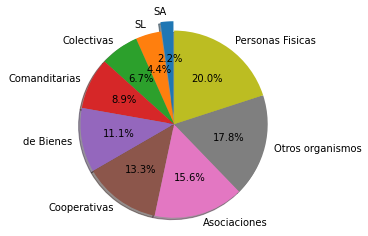

In [208]:
df_num_empr = pd.read_csv('../csv/empresas_hipotecas_españa.csv')
pd.factorize(df_num_empr["TipoEmpresa"], sort=False, na_sentinel=- 1, size_hint=None)

#Convertimos variable categórica donde 'Sociedad_Anonima'=1, 'Sociedades_responsabilidad-limitada'=2,
#'Sociedades_colectivas'=3, 'Sociedades_comanditarias'=4,'Comunidades_de_bienes'=5,
#'Sociedades_Cooperativas'=6,'Asociaciones_y_otros'=7, 'Organismos_autonomos_y_otros'=8,"Personas_fisicas'=9]
        
df_num_empr['TipoEmpresa'] = df_num_empr['TipoEmpresa'].apply(lambda x: np.where(df_num_empr['TipoEmpresa'].unique()==x)[0][0])
df_num_empr=df_num_empr[(df_num_empr['TipoHipoteca']=='Numero_hipotecas')]
df_num_empr[df_num_empr['TipoEmpresa']==2017]['TipoEmpresa'].sum()
total_empresas = pd.DataFrame(df_num_empr.groupby("Anio").sum())

uno=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 1, 'TipoEmpresa'].sum()
dos=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 2, 'TipoEmpresa'].sum()
tres=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 3, 'TipoEmpresa'].sum()
cuatro=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 4, 'TipoEmpresa'].sum()
cinco=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 5, 'TipoEmpresa'].sum()
seis=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 6, 'TipoEmpresa'].sum()
siete=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 7, 'TipoEmpresa'].sum()
ocho=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 8, 'TipoEmpresa'].sum()
nueve=df_num_empr.loc[df_num_empr['TipoEmpresa'] == 9, 'TipoEmpresa'].sum()
print(uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve)



labels = 'SA', 'SL', 'Colectivas', 'Comanditarias', "de Bienes", "Cooperativas", "Asociaciones", "Otros organismos", "Personas Fisicas"
sizes = [uno, dos, tres, cuatro,cinco,seis,siete,ocho,nueve]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()